In [220]:
import sqlite3 as sql3
import pandas as pd
import matplotlib.pyplot as plt

In [221]:
class Pokemon():
    def __init__(self):
        self.conexao = sql3.connect('../../database/Pokemon.db')
        self.cursor = self.conexao.cursor()
        self.pokemons= self.cursor.execute('SELECT count(id) FROM pokemon;').fetchone()[0]
    def fortes(self):
        df = pd.read_sql('SELECT Total,Name FROM pokemon;',self.conexao)
        df=df.nlargest(5, 'Total')
        return df
    def rapidos(self):
        df = pd.read_sql('SELECT Speed,Name FROM pokemon;',self.conexao)
        df=df.nlargest(5, 'Speed')
        return df
    def frageis(self):
        df = pd.read_sql('SELECT SpDef,HP,Defense,Name FROM pokemon;',self.conexao)
        df['fragilidade'] = (df['HP'].astype(int) * (df['Defense'].astype(int)+df['SpDef'].astype(int)))
        df=df.nsmallest(5,'fragilidade')
        return df
    
pokemon=Pokemon()

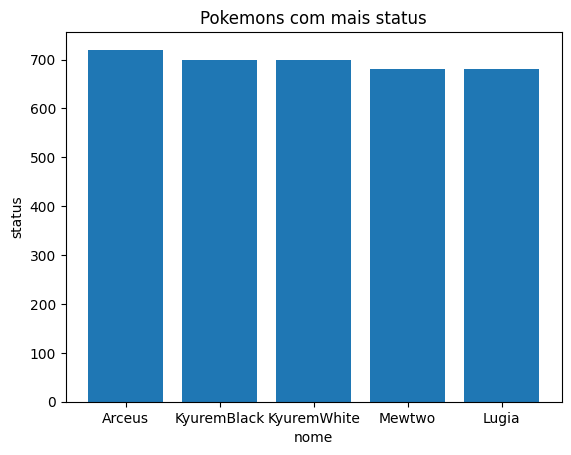

In [222]:
df=pokemon.fortes()
totais=[]
nomes=[]

for Total in df['Total']:
    totais.append(Total)
for Name in df['Name']:
    Name=Name.split(' ')[0]
    nomes.append(Name)

# Criar gráfico de barras
plt.bar(nomes, totais)

# Adicionar título e rótulos aos eixos
plt.title('Pokemons com mais status')
plt.xlabel('nome')
plt.ylabel('status')

# Mostrar o gráfico
plt.show()

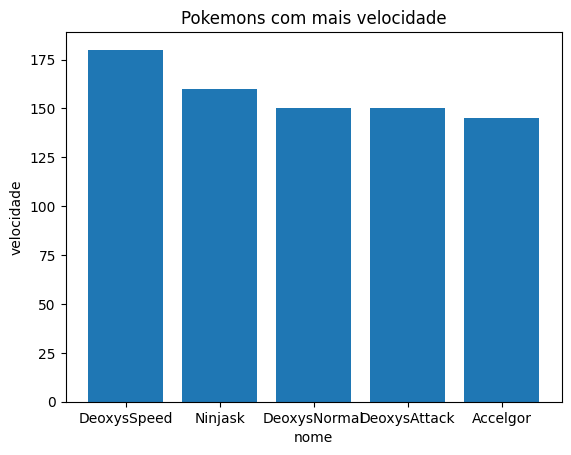

In [223]:
df=pokemon.rapidos()
totais=[]
nomes=[]

for Speed in df['Speed']:
    totais.append(Speed)
for Name in df['Name']:
    Name=Name.split(' ')[0]
    nomes.append(Name)

# Criar gráfico de barras
plt.bar(nomes, totais)

# Adicionar título e rótulos aos eixos
plt.title('Pokemons com mais velocidade')
plt.xlabel('nome')
plt.ylabel('velocidade')

# Mostrar o gráfico
plt.show()

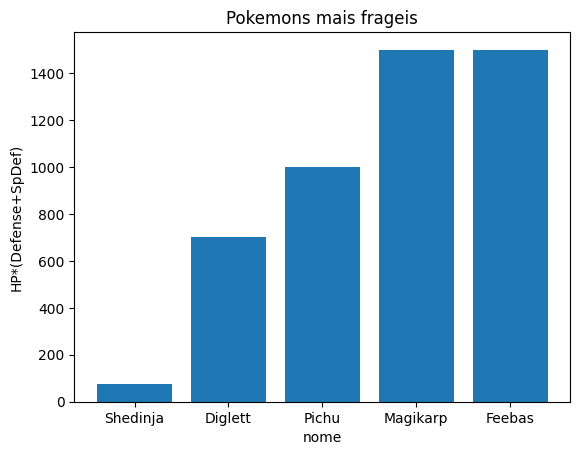

In [224]:
df=pokemon.frageis()
totais=[]
nomes=[]

for hp in df['fragilidade']:
    totais.append(hp)
for Name in df['Name']:
    Name=Name.split(' ')[0]
    nomes.append(Name)
# Criar gráfico de barras
plt.bar(nomes, totais)

# Adicionar título e rótulos aos eixos
plt.title('Pokemons mais frageis')
plt.xlabel('nome')
plt.ylabel('HP*(Defense+SpDef)')

# Mostrar o gráfico
plt.show()